# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

colors = ["#7a0b1a", "#696667", "#66c959"] 
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))



## 1. Coleta de Dados

In [2]:
df = sns.load_dataset("attention")
df.to_csv('../data/raw/data.csv', index=False)
df = pd.read_csv('../data/raw/data.csv', index_col=0)
df = df.rename_axis('')
df['subject'] = df['subject'].astype('category')
df.head()

,subject,attention,solutions,score
,,,,
0,1,divided,1,2.0
1,2,divided,1,3.0
2,3,divided,1,3.0
3,4,divided,1,5.0
4,5,divided,1,4.0


## 2. Descrição dos dados

![Tipo de Atenção ](../data/external/Divided_x_focused.jpg)

**Attention** é um conjunto de dados construído com base em testes realizados por pessoas, com o objetivo de verificar os diferentes tipos de **notas obtidas** com base em um tipo de **atenção empregada**, seja ela **focada(focused) ou dividida(divided)**.



In [3]:
dicionario = pd.DataFrame([
    {
        "variavel": "subject",
        "descricao": "Pessoa realizadora do teste",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },{
        "variavel": "attention",
        "descricao": "Tipo de atencao utilizada",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },{
        "variavel": "solutions",
        "descricao": "Quantidade de solucoes realizadas",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
        "variavel": "score",
        "descricao": "Nota referente de eficiencia do teste",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    }
])

In [4]:
dicionario.to_csv('../data/external/dictionary.csv', index=False)

In [5]:
dicionario

,variavel,descricao,tipo,subtipo
0,subject,Pessoa realizadora do teste,qualitativa,nominal
1,attention,Tipo de atencao utilizada,qualitativa,nominal
2,solutions,Quantidade de solucoes realizadas,quantitativa,discreta
3,score,Nota referente de eficiencia do teste,quantitativa,discreta



> O dataset é composto por 4 viaráveis, com 2 qualitativas nominais e 2 quantitativas discretas.



---
# 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Há alguma relação entre o tipo de atenção aplicada e a pontuação alcançada?
- Há alguma relação entre o tipo de atenção aplicada e a quantidade de soluções propostas?
- Há alguma relação entre a quantidade de soluções propostas e a pontuação alcançada? 
- Há alguma relação entre a quantidade de soluções propostas, pontuação alcançada e o tipo de atenção aplicada?

---
### Existem dados faltantes, se sim quantos e em quais variáveis?

In [9]:
# colunas (variáveis) contendo valores faltantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows= df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    f"Ao retornar uma lista vazia, `{number_of_na_by_column.axes[0].to_list()}`, podemos concluir que não há dados faltantes."
    " Com isso, as próximas análises serão realizadas utilizando o dataset de forma integral."
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

Ao retornar uma lista vazia, `[]`, podemos concluir que não há dados faltantes. Com isso, as próximas análises serão realizadas utilizando o dataset de forma integral.

 ---

#### Qual a distribuição dos dados (variável por variável)? 

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [10]:
df.describe(include='all')

,subject,attention,solutions,score
count,60.0,60,60.000000,60.000000
unique,20.0,2,NaN,NaN
top,1.0,divided,NaN,NaN
freq,3.0,30,NaN,NaN
mean,NaN,NaN,2.000000,5.958333
std,NaN,NaN,0.823387,1.621601
min,NaN,NaN,1.000000,2.000000
25%,NaN,NaN,1.000000,5.000000
50%,NaN,NaN,2.000000,6.000000
75%,NaN,NaN,3.000000,7.000000


---
- As pontuações variam de 2 a 9, com uma média de aproximadamente 6.
- A maioria das pontuações estão concentradas entre 5 e 7, como indicado pelos quartis (25% - 75%).
- Os participantes propuseram em média 2 soluções para os problemas apresentados, com um mínimo de 1 e o máximo de 3 soluções.
- A divisão dos testes realizados com atenção dividida e com atenção focada foi meio a meio (50%). 
- Há 20 tipos de pessoas diferentes e todas realizaram o teste 3 vezes durante o dataset inteiro.

---
##### Distribuição das variáveis qualitativas

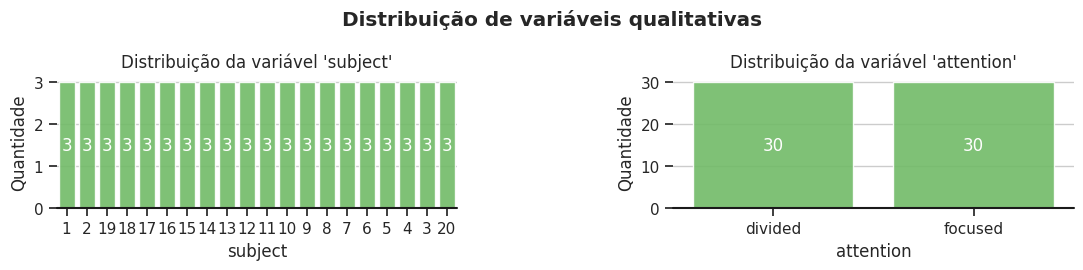

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[2],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
- Distribuição da variável attention é meio a meio (50%).
- Podemos observar a distribuição igualitária da quantidade de testes realizados pelas 20 diferentes pessoas no dataset.

---
##### Distribuição das variáveis quantitativas

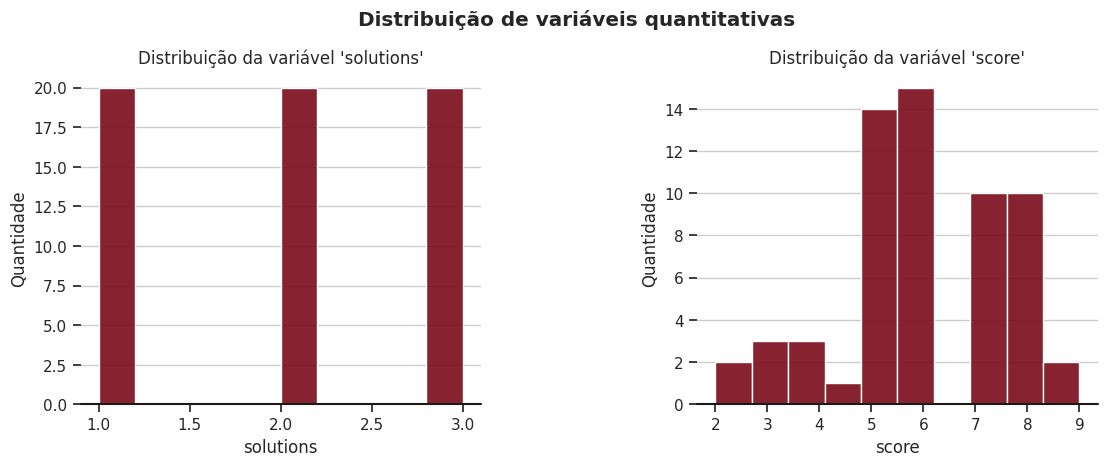

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        bins=10,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

---
Com base nas visualizações acima, podemos inferir que:
- A distribuição da variável soluções está distribuída de forma equitativa, refletindo uma distribuição uniforme entre as diferentes quantidades de soluções propostas.
- A distribuição da variável score possui duas modas, encontradas nos scores de valores 5 e 6.
- A nota mínima (2) e a nota máxima (9) apresentam a mesma frequência.

---
### Há alguma relação entre o tipo de atenção aplicada e a pontuação alcançada?

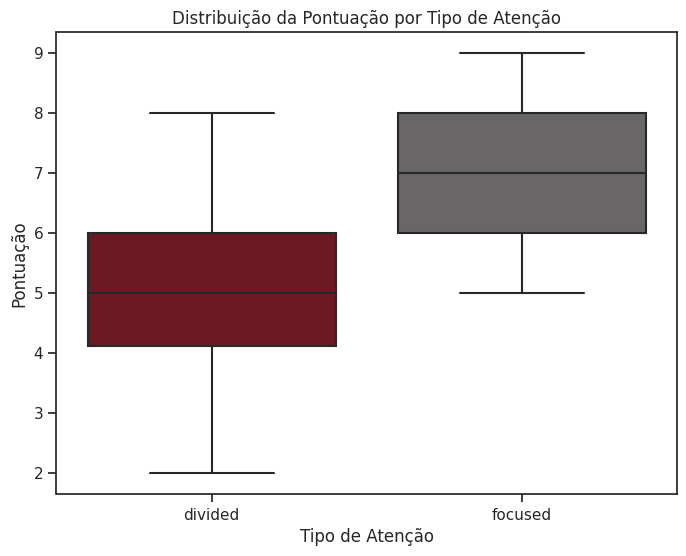

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='attention', y='score')
plt.title('Distribuição da Pontuação por Tipo de Atenção')
plt.xlabel('Tipo de Atenção')
plt.ylabel('Pontuação')
plt.show()

- O tipo de atenção "focada" obteve melhores resultados quanto comparado ao tipo de atenção "divida".

---
### Há alguma relação entre o tipo de atenção aplicada e a quantidade de soluções propostas?


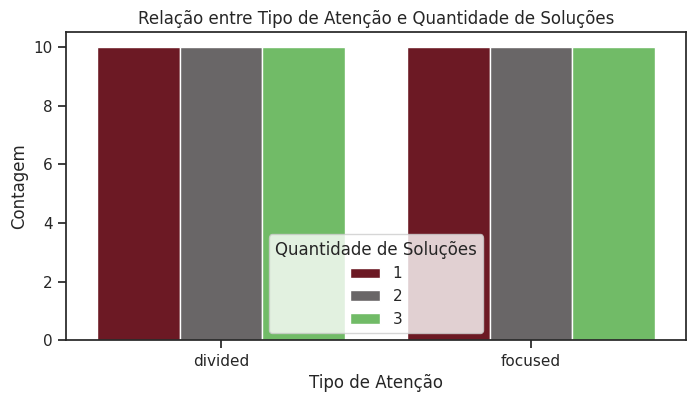

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='attention', hue='solutions')
plt.title('Relação entre Tipo de Atenção e Quantidade de Soluções')
plt.xlabel('Tipo de Atenção')
plt.ylabel('Contagem')
plt.legend(title='Quantidade de Soluções')
plt.show()

- O tipo de atenção utilizada não alterou a quantidade de soluções propostas.

---
### Há alguma relação entre a quantidade de soluções propostas e a pontuação alcançada? 


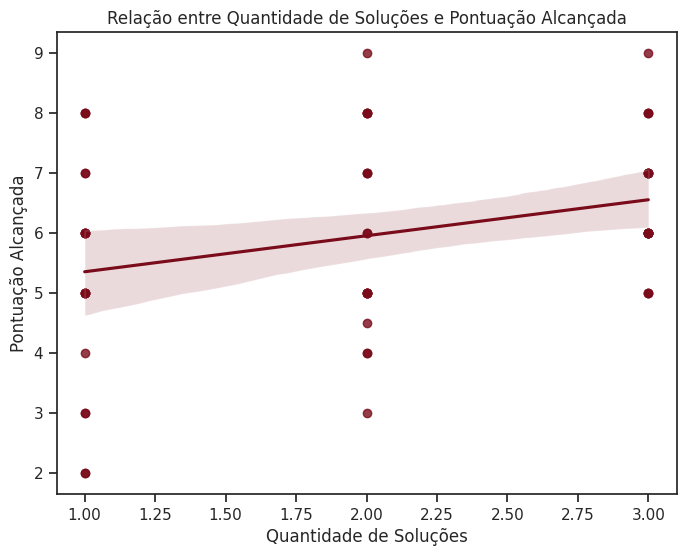

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='solutions', y='score')
plt.title('Relação entre Quantidade de Soluções e Pontuação Alcançada')
plt.xlabel('Quantidade de Soluções')
plt.ylabel('Pontuação Alcançada')
plt.show()


- Pode-se observar que há uma linha crescente no sentido que quanto mais soluções foram propostas, melhores as notas alcançadas. Com isso podemos concluir que quanto mais soluções propostas maiores a chance de se obter uma nota melhor. 

---
### Há alguma relação entre a quantidade de soluções propostas, pontuação alcançada e o tipo de atenção aplicada? 


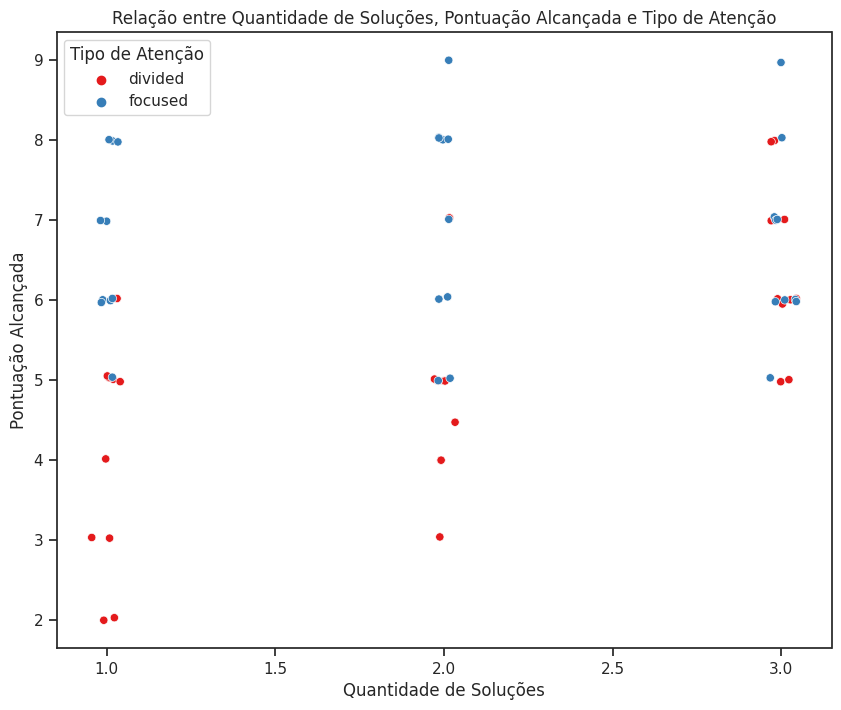

In [21]:
# Um pequeno deslocamento aleatório aos dados para evitar sobreposição
df['solutions_jitter'] = df['solutions'] + np.random.normal(0, 0.02, size=len(df))
df['score_jitter'] = df['score'] + np.random.normal(0, 0.022, size=len(df))

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='solutions_jitter', y='score_jitter', hue='attention', palette='Set1')
plt.title('Relação entre Quantidade de Soluções, Pontuação Alcançada e Tipo de Atenção')
plt.xlabel('Quantidade de Soluções')
plt.ylabel('Pontuação Alcançada')
plt.legend(title='Tipo de Atenção')
plt.show()


- A menor nota foi alcançada com uma única solução proposta e com atenção dividida.
- A maior nota foi alcançada com três soluções propostas e com atenção focada.
- A atenção focada no geral, garantiu melhores resultados, indepentemente da quantidade de soluções propostas. 

---
# 3. Insights

De acordo com a análise em relação ao dicionário de dados e as visualizações criadas, as informações mais relevantes que conseguimos adquirir são:

- Há um equilíbrio na distribuição da atenção aplicada nos testes realizados com atenção dividida e com atenção focada. A distribuição foi equitativa, com cada tipo de atenção representando 50% dos casos.
- A maioria das pontuações está concetrada entre 5 e 7, sugerindo uma tendência centralizada nas avaliações.
- A presença de duas modas nas pontuações, centradas em valores de 5 e 6, sugere uma distribuição bimodal no desempenho dos participantes.
- Os resultados mostram que a atenção focada geralmente leva a melhores resultados, independentemente da quantidade de soluções propostas.
-  Existe uma correlação positiva entre o número de soluções propostas e as notas obtidas, indicando que um maior esforço na resolução dos problemas está associado a um melhor desempenho.
-  A atenção aplicada não parece influenciar a quantidade de soluções propostas, sugerindo que os participantes mantiveram uma abordagem consistente independentemente do tipo de atenção.
-  A menor nota foi alcançada quanto uma única solução proposta e com atenção dividida. A maior nota foi alcançada com três soluções propostas e com atenção focada. Concluindo-se que tanto mais soluções propostas e uma atenção focada, maior a chance de se obter boas notas. 

---
# 4. Observação

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.